# `LENDING CLUB CASE STUDY`

**`AIM`** : To identify those significant attributes/drivers that influences loan default

### Importing libraries

In [466]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#setting pandas dataframe display option
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## `Part 1: Importing Data`

In [467]:
df=pd.read_csv(r'C:\Users\avesh\CODES!\Lending club case study\loan.csv',low_memory=False)

In [468]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87000,B,B2,NaN,10+ years,RENT,24000.00000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65000,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00000,0.00000,5863.15519,5833.84000,5000.00000,863.16000,0.00000,0.00000,0.00000,Jan-15,171.62000,NaN,May-16,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83000,C,C4,Ryder,< 1 year,RENT,30000.00000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00000,0.00000,1008.71000,1008.71000,456.46000,435.17000,0.00000,117.08000,1.11000,Apr-13,119.66000,NaN,Sep-13,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33000,C,C5,NaN,10+ years,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72000,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00000,0.00000,3005.66684,3005.67000,2400.00000,605.67000,0.00000,0.00000,0.00000,Jun-14,649.91000,NaN,May-16,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00000,0,Feb-96,1,35.00000,NaN,10,0,5598,21%,37,f,0.00000,0.00000,12231.89000,12231.89000,10000.00000,2214.92000,16.97000,

In [469]:
df.shape #nearly 40000 records and 111 attributes to analyse

(39717, 111)

## `Part 2: DATA WRANGLING`

In [470]:
print("Total records:",len(df.id),"\n\nTotal unique loan records:",df.id.nunique(),"\nTotal unique members:",df.member_id.nunique())

#We see that every borrower has only one loan record 

Total records: 39717 

Total unique loan records: 39717 
Total unique members: 39717


### Handling missing values

In [471]:
# assessing missing values present in the data

((df.isnull().sum().sum())/(df.shape[0]*df.shape[1]))*100

#Nearly 50% of the individual cell entries have a missing value in the dataset

51.33989643393677

In [472]:
# Observing missing values across columns

missing_columns=pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns={"% missing"})
missing_columns.sort_values(by="% missing",ascending=False,inplace=True)
#We will drop columns with % missing more than 7%

missing_columns

,% missing
verification_status_joint,100.00000
annual_inc_joint,100.00000
mo_sin_old_rev_tl_op,100.00000
mo_sin_old_il_acct,100.00000
bc_util,100.00000
bc_open_to_buy,100.00000
avg_cur_bal,100.00000
acc_open_past_24mths,100.00000
inq_last_12m,100.00000
total_cu_tl,100.00000


In [473]:
#only including columns with less than 7% missing

df=df.loc[:,missing_columns['% missing']<7]

In [474]:
#checking the column missing % after dropping

((df.isnull().sum())/df.shape[0])*100

id                           0.00000
member_id                    0.00000
loan_amnt                    0.00000
funded_amnt                  0.00000
funded_amnt_inv              0.00000
term                         0.00000
int_rate                     0.00000
installment                  0.00000
grade                        0.00000
sub_grade                    0.00000
emp_title                    6.19130
emp_length                   2.70665
home_ownership               0.00000
annual_inc                   0.00000
verification_status          0.00000
issue_d                      0.00000
loan_status                  0.00000
pymnt_plan                   0.00000
url                          0.00000
purpose                      0.00000
title                        0.02770
zip_code                     0.00000
addr_state                   0.00000
dti                          0.00000
delinq_2yrs                  0.00000
earliest_cr_line             0.00000
inq_last_6mths               0.00000
o

In [475]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87000,B,B2,NaN,10+ years,RENT,24000.00000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65000,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00000,0.00000,5863.15519,5833.84000,5000.00000,863.16000,0.00000,0.00000,0.00000,Jan-15,171.62000,May-16,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83000,C,C4,Ryder,< 1 year,RENT,30000.00000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00000,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00000,0.00000,1008.71000,1008.71000,456.46000,435.17000,0.00000,117.08000,1.11000,Apr-13,119.66000,Sep-13,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33000,C,C5,NaN,10+ years,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72000,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00000,0.00000,3005.66684,3005.67000,2400.00000,605.67000,0.00000,0.00000,0.00000,Jun-14,649.91000,May-16,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00000,0,Feb-96,1,10,0,5598,21%,37,f,0.00000,0.00000,12231.89000,12231.89000,10000.00000,2214.92000,16.97000,0.00000,0.00000,Jan-15,357.48000,Apr-16,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79000,B,B5,University Medical Group,1 year,RENT,80000.00000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94000,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06000,524.06000,3513.33000,3513.33000,2475.94000,1037.39000,0.00000,0.00000,0.00000,May-16,67.79000,May-16,0.00000,1,INDIVIDUAL,0,0.00000,0,0.00000,0.00000



### Dropping columns

In [476]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [477]:
#since 'purpose' column has a much better capture than 'title' column we chose to drop 'title'

df.title.value_counts()

Debt Consolidation                         2184
Debt Consolidation Loan                    1729
Personal Loan                               659
Consolidation                               517
debt consolidation                          505
                                           ... 
Home Improvement and debt consolidation       1
Discover + Amazon                             1
Land Balloon Payment                          1
Stress Relief                                 1
Consolidator Line                             1
Name: title, Length: 19615, dtype: int64

In [478]:
df.pymnt_plan.value_counts() #only one category present, so we drop this column

#all loans have no payment plan in place

n    39717
Name: pymnt_plan, dtype: int64

In [479]:
df.initial_list_status.value_counts() #only one category present, so we drop this column

#all loans were initally listed as fractional loans to disbursed and no loan was listed as a whole

f    39717
Name: initial_list_status, dtype: int64

In [480]:
df.policy_code.value_counts() #only one category present, so we drop this column

#only publicly available policies are availed

1    39717
Name: policy_code, dtype: int64

In [481]:
df.delinq_amnt.value_counts() #only one category present, so we drop this column

0    39717
Name: delinq_amnt, dtype: int64

In [482]:
df.chargeoff_within_12_mths.value_counts() #only one category present, so we drop this column

0.00000    39661
Name: chargeoff_within_12_mths, dtype: int64

In [483]:
df.application_type.value_counts() #only one category present, so we drop this column

#there is no joint loan application

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [484]:
df.acc_now_delinq.value_counts() #only one category present, so we drop this column

0    39717
Name: acc_now_delinq, dtype: int64

In [485]:
df.tax_liens.value_counts() #only one category present, so we drop this column

0.00000    39678
Name: tax_liens, dtype: int64

In [486]:
df.collections_12_mths_ex_med.value_counts() #only one category present, so we drop this column

0.00000    39661
Name: collections_12_mths_ex_med, dtype: int64

In [487]:
#since the recovery collection fee is about 1%-2% of the total recoveries made, we drop this column 

(df.collection_recovery_fee/df.recoveries).describe()

count   4218.00000
mean       0.07171
std        0.10640
min        0.00000
25%        0.00970
50%        0.01028
75%        0.17254
max        0.63370
dtype: float64

In [488]:
# dropping columns that add no business value to the analysis

df=df.drop(columns=['id','member_id','url','emp_title','zip_code','pymnt_plan','title','initial_list_status','collection_recovery_fee',
                    'policy_code','delinq_amnt','chargeoff_within_12_mths','application_type','acc_now_delinq','tax_liens','delinq_2yrs',
                    'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                   'recoveries','collections_12_mths_ex_med','out_prncp','out_prncp_inv','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])

#we also drop columns that have significance after the approval of the loan and that do not influence the decision of providing loan
#Eg: total_pymnt,recoveries

#Now we have only features that are significant on or before approval of a loan (baseline features)

In [489]:
df.shape

(39717, 25)

In [490]:
df['issued_month'], df['issued_year'] = df['issue_d'].str.split('-').str

In [491]:
df['issued_year'] = '20' + df['issued_year']

columns = ['issued_year']
df[columns] = df[columns].astype(np.int)

In [492]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year
0,5000,5000,4975.00000,36 months,10.65%,162.87000,B,B2,10+ years,RENT,24000.00000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65000,Jan-85,1,3,0,13648,83.70%,9,0.00000,Dec,2011
1,2500,2500,2500.00000,60 months,15.27%,59.83000,C,C4,< 1 year,RENT,30000.00000,Source Verified,Dec-11,Charged Off,car,GA,1.00000,Apr-99,5,3,0,1687,9.40%,4,0.00000,Dec,2011
2,2400,2400,2400.00000,36 months,15.96%,84.33000,C,C5,10+ years,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72000,Nov-01,2,2,0,2956,98.50%,10,0.00000,Dec,2011
3,10000,10000,10000.00000,36 months,13.49%,339.31000,C,C1,10+ years,RENT,49200.00000,Source Verified,Dec-11,Fully Paid,other,CA,20.00000,Feb-96,1,10,0,5598,21%,37,0.00000,Dec,2011
4,3000,3000,3000.00000,60 months,12.69%,67.79000,B,B5,1 year,RENT,80000.00000,Source Verified,Dec-11,Current,other,OR,17.94000,Jan-96,0,15,0,27783,53.90%,38,0.00000,Dec,2011


### Correcting column types

In [493]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year
0,5000,5000,4975.00000,36 months,10.65%,162.87000,B,B2,10+ years,RENT,24000.00000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65000,Jan-85,1,3,0,13648,83.70%,9,0.00000,Dec,2011
1,2500,2500,2500.00000,60 months,15.27%,59.83000,C,C4,< 1 year,RENT,30000.00000,Source Verified,Dec-11,Charged Off,car,GA,1.00000,Apr-99,5,3,0,1687,9.40%,4,0.00000,Dec,2011
2,2400,2400,2400.00000,36 months,15.96%,84.33000,C,C5,10+ years,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72000,Nov-01,2,2,0,2956,98.50%,10,0.00000,Dec,2011


In [494]:
#Removing % from interest rate column, revol_util column

df.int_rate=df.int_rate.apply(lambda x:str(x).replace("%","")).astype('float64')
df.revol_util=df.revol_util.apply(lambda x:str(x).replace("%","")).astype('float64')

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [496]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year
0,5000,5000,4975.00000,36 months,10.65000,162.87000,B,B2,10+ years,RENT,24000.00000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65000,Jan-85,1,3,0,13648,83.70000,9,0.00000,Dec,2011
1,2500,2500,2500.00000,60 months,15.27000,59.83000,C,C4,< 1 year,RENT,30000.00000,Source Verified,Dec-11,Charged Off,car,GA,1.00000,Apr-99,5,3,0,1687,9.40000,4,0.00000,Dec,2011
2,2400,2400,2400.00000,36 months,15.96000,84.33000,C,C5,10+ years,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72000,Nov-01,2,2,0,2956,98.50000,10,0.00000,Dec,2011
3,10000,10000,10000.00000,36 months,13.49000,339.31000,C,C1,10+ years,RENT,49200.00000,Source Verified,Dec-11,Fully Paid,other,CA,20.00000,Feb-96,1,10,0,5598,21.00000,37,0.00000,Dec,2011
4,3000,3000,3000.00000,60 months,12.69000,67.79000,B,B5,1 year,RENT,80000.00000,Source Verified,Dec-11,Current,other,OR,17.94000,Jan-96,0,15,0,27783,53.90000,38,0.00000,Dec,2011


### Converting all cases to uppercase

In [497]:
col_names=['term','grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose',
   'addr_state','earliest_cr_line']
for i in col_names:
    df[i]=df[i].str.upper().str.strip()

In [498]:
df.head() #checking if operation is successful

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year
0,5000,5000,4975.00000,36 MONTHS,10.65000,162.87000,B,B2,10+ YEARS,RENT,24000.00000,VERIFIED,DEC-11,FULLY PAID,CREDIT_CARD,AZ,27.65000,JAN-85,1,3,0,13648,83.70000,9,0.00000,Dec,2011
1,2500,2500,2500.00000,60 MONTHS,15.27000,59.83000,C,C4,< 1 YEAR,RENT,30000.00000,SOURCE VERIFIED,DEC-11,CHARGED OFF,CAR,GA,1.00000,APR-99,5,3,0,1687,9.40000,4,0.00000,Dec,2011
2,2400,2400,2400.00000,36 MONTHS,15.96000,84.33000,C,C5,10+ YEARS,RENT,12252.00000,NOT VERIFIED,DEC-11,FULLY PAID,SMALL_BUSINESS,IL,8.72000,NOV-01,2,2,0,2956,98.50000,10,0.00000,Dec,2011
3,10000,10000,10000.00000,36 MONTHS,13.49000,339.31000,C,C1,10+ YEARS,RENT,49200.00000,SOURCE VERIFIED,DEC-11,FULLY PAID,OTHER,CA,20.00000,FEB-96,1,10,0,5598,21.00000,37,0.00000,Dec,2011
4,3000,3000,3000.00000,60 MONTHS,12.69000,67.79000,B,B5,1 YEAR,RENT,80000.00000,SOURCE VERIFIED,DEC-11,CURRENT,OTHER,OR,17.94000,JAN-96,0,15,0,27783,53.90000,38,0.00000,Dec,2011


In [499]:
# Now, lets Extract the term_months from term column and drop term

df['term_months'] = df['term'].str.rstrip('MONTHS')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year,term_months
0,5000,5000,4975.00000,36 MONTHS,10.65000,162.87000,B,B2,10+ YEARS,RENT,24000.00000,VERIFIED,DEC-11,FULLY PAID,CREDIT_CARD,AZ,27.65000,JAN-85,1,3,0,13648,83.70000,9,0.00000,Dec,2011,36
1,2500,2500,2500.00000,60 MONTHS,15.27000,59.83000,C,C4,< 1 YEAR,RENT,30000.00000,SOURCE VERIFIED,DEC-11,CHARGED OFF,CAR,GA,1.00000,APR-99,5,3,0,1687,9.40000,4,0.00000,Dec,2011,60
2,2400,2400,2400.00000,36 MONTHS,15.96000,84.33000,C,C5,10+ YEARS,RENT,12252.00000,NOT VERIFIED,DEC-11,FULLY PAID,SMALL_BUSINESS,IL,8.72000,NOV-01,2,2,0,2956,98.50000,10,0.00000,Dec,2011,36
3,10000,10000,10000.00000,36 MONTHS,13.49000,339.31000,C,C1,10+ YEARS,RENT,49200.00000,SOURCE VERIFIED,DEC-11,FULLY PAID,OTHER,CA,20.00000,FEB-96,1,10,0,5598,21.00000,37,0.00000,Dec,2011,36
4,3000,3000,3000.00000,60 MONTHS,12.69000,67.79000,B,B5,1 YEAR,RENT,80000.00000,SOURCE VERIFIED,DEC-11,CURRENT,OTHER,OR,17.94000,JAN-96,0,15,0,27783,53.90000,38,0.00000,Dec,2011,60


### Validating internal rules

In [500]:
df[df.funded_amnt>df.loan_amnt] #no loan where funded amount > listed loan amount

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year,term_months


In [501]:
df[df.funded_amnt_inv>df.funded_amnt] #no loan where funded amount by investor > total funded amount

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year,term_months


In [502]:
df[df.total_acc<df.open_acc] #this does not seem to be possible, so we remove such records

df=df[df.total_acc>=df.open_acc]

### Creating additional features

In [503]:
df['revol_credit_limit']=round(100*df['revol_bal']/df.revol_util,2)

df.drop(columns=['revol_bal'],inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year,term_months,revol_credit_limit
0,5000,5000,4975.00000,36 MONTHS,10.65000,162.87000,B,B2,10+ YEARS,RENT,24000.00000,VERIFIED,DEC-11,FULLY PAID,CREDIT_CARD,AZ,27.65000,JAN-85,1,3,0,83.70000,9,0.00000,Dec,2011,36,16305.85000
1,2500,2500,2500.00000,60 MONTHS,15.27000,59.83000,C,C4,< 1 YEAR,RENT,30000.00000,SOURCE VERIFIED,DEC-11,CHARGED OFF,CAR,GA,1.00000,APR-99,5,3,0,9.40000,4,0.00000,Dec,2011,60,17946.81000
2,2400,2400,2400.00000,36 MONTHS,15.96000,84.33000,C,C5,10+ YEARS,RENT,12252.00000,NOT VERIFIED,DEC-11,FULLY PAID,SMALL_BUSINESS,IL,8.72000,NOV-01,2,2,0,98.50000,10,0.00000,Dec,2011,36,3001.02000
3,10000,10000,10000.00000,36 MONTHS,13.49000,339.31000,C,C1,10+ YEARS,RENT,49200.00000,SOURCE VERIFIED,DEC-11,FULLY PAID,OTHER,CA,20.00000,FEB-96,1,10,0,21.00000,37,0.00000,Dec,2011,36,26657.14000
4,3000,3000,3000.00000,60 MONTHS,12.69000,67.79000,B,B5,1 YEAR,RENT,80000.00000,SOURCE VERIFIED,DEC-11,CURRENT,OTHER,OR,17.94000,JAN-96,0,15,0,53.90000,38,0.00000,Dec,2011,60,51545.45000


In [504]:
df['loan_issued_year']=df['issue_d'].apply(lambda x:x.split('-')[1]) #getting year of loan issued

In [505]:
#tagging states to a region
midwest=['IA','IL','IN','KS','MI','MN','MO','ND','NE','OH','SD','WI']
northeast=['CT','MA','ME','NH','NJ','NY','PA','RI','VT']
south=['AL','AR','DC','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']
west=['AK','AZ','CA','CO','HI','ID','MT','NM','NV','OR','UT','WA','WY']

def states_to_region(state_addr):
    if state_addr in midwest:
        return 'MIDWEST'
    elif state_addr in northeast:
        return 'NORTHEAST'
    elif state_addr in south:
        return 'SOUTH'
    elif state_addr in west:
        return 'WEST'
    else:
        return 'MISSING'
    
df['region']=df['addr_state'].apply(states_to_region)

### Binning data

In [506]:
df['loan_amnt_category']=pd.cut(df.loan_amnt,bins=[0,11500,23000,35000],labels=['<=$11500','$11500,$23000','>$23000'],right=True)
df['funded_amnt_category']=pd.cut(df.funded_amnt,bins=[0,11500,23000,35000],labels=['<=$11500','$11500,$23000','>$23000'],right=True)
df['funded_amnt_inv_category']=pd.cut(df.funded_amnt_inv,bins=[0,11500,23000,35000],labels=['<=$11500','$11500,$23000','>$23000'],right=True)
df['int_rate_category']=pd.cut(df.int_rate,bins=[0,12,18,25],labels=['<=12%','12%-18%','>18%'],right=True)
df['annual_inc_category']=pd.cut(df.annual_inc,bins=[0,10000,50000,6000000],labels=['LOW INCOME','AVERAGE INCOME','HIGH INCOME'],right=True)

### Removing unwanted characters

In [507]:
df['purpose']=df['purpose'].apply(lambda x:str(x).replace("_"," "))

### Removing outliers

In [508]:
#We exclude borrowers with abnormally high incomes

df=df[df.annual_inc<np.percentile(df.annual_inc,99)]

### Filtering data

In [509]:
#Since we are interested in loans that are either defaulted or fully paid, we exclude records with loan_status='CURRENT'

df=df[df.loan_status!='CURRENT']
df.loan_status.value_counts()

FULLY PAID     32608
CHARGED OFF     5584
Name: loan_status, dtype: int64

In [510]:
df.loan_status.value_counts(normalize=True)

FULLY PAID    0.85379
CHARGED OFF   0.14621
Name: loan_status, dtype: float64

In [511]:
defaulted_loans=df[df.loan_status=='CHARGED OFF']
paid_loans=df[df.loan_status=='FULLY PAID']
Current_loans = df[df.loan_status=='CURRENT']

## `UNIVARIATE ANALYSIS`

#### `categorical features`

In [512]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year,term_months,revol_credit_limit,loan_issued_year,region,loan_amnt_category,funded_amnt_category,funded_amnt_inv_category,int_rate_category,annual_inc_category
0,5000,5000,4975.00000,36 MONTHS,10.65000,162.87000,B,B2,10+ YEARS,RENT,24000.00000,VERIFIED,DEC-11,FULLY PAID,CREDIT CARD,AZ,27.65000,JAN-85,1,3,0,83.70000,9,0.00000,Dec,2011,36,16305.85000,11,WEST,<=$11500,<=$11500,<=$11500,<=12%,AVERAGE INCOME
1,2500,2500,2500.00000,60 MONTHS,15.27000,59.83000,C,C4,< 1 YEAR,RENT,30000.00000,SOURCE VERIFIED,DEC-11,CHARGED OFF,CAR,GA,1.00000,APR-99,5,3,0,9.40000,4,0.00000,Dec,2011,60,17946.81000,11,SOUTH,<=$11500,<=$11500,<=$11500,12%-18%,AVERAGE INCOME
2,2400,2400,2400.00000,36 MONTHS,15.96000,84.33000,C,C5,10+ YEARS,RENT,12252.00000,NOT VERIFIED,DEC-11,FULLY PAID,SMALL BUSINESS,IL,8.72000,NOV-01,2,2,0,98.50000,10,0.00000,Dec,2011,36,3001.02000,11,MIDWEST,<=$11500,<=$11500,<=$11500,12%-18%,AVERAGE INCOME
3,10000,10000,10000.00000,36 MONTHS,13.49000,339.31000,C,C1,10+ YEARS,RENT,49200.00000,SOURCE VERIFIED,DEC-11,FULLY PAID,OTHER,CA,20.00000,FEB-96,1,10,0,21.00000,37,0.00000,Dec,2011,36,26657.14000,11,WEST,<=$11500,<=$11500,<=$11500,12%-18%,AVERAGE INCOME
5,5000,5000,5000.00000,36 MONTHS,7.90000,156.46000,A,A4,3 YEARS,RENT,36000.00000,SOURCE VERIFIED,DEC-11,FULLY PAID,WEDDING,AZ,11.20000,NOV-04,3,9,0,28.30000,12,0.00000,Dec,2011,36,28137.81000,11,WEST,<=$11500,<=$11500,<=$11500,<=12%,AVERAGE INCOME


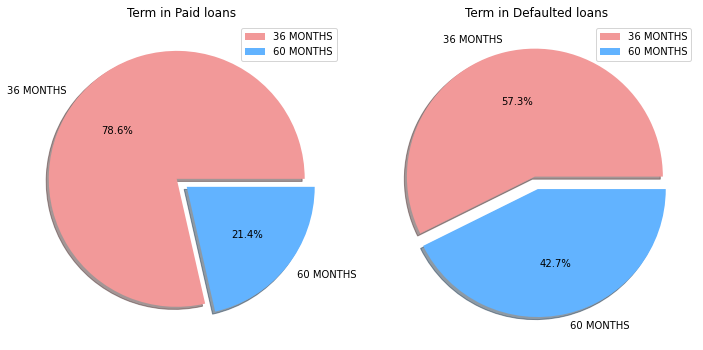

In [513]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) 

ax1.pie(paid_loans.term.value_counts().values,labels = paid_loans.term.value_counts().index,colors = colors,autopct = '%1.1f%%',explode=[0.05]*2,shadow=True)
ax1.set_title('Term in Paid loans')
ax1.legend()
ax2.pie(defaulted_loans.term.value_counts().values,labels = defaulted_loans.term.value_counts().index,colors = colors,autopct = '%1.1f%%',explode=[0.05]*2,shadow=True)
ax2.set_title('Term in Defaulted loans')
ax2.legend()
plt.tight_layout()
plt.show()


#long term loans tend to default more often

In [514]:
fig=px.sunburst(paid_loans,path=['grade','sub_grade'],title="Loan grade in paid loans")
fig.update_traces(textinfo="label+value")
fig.update_layout(
    title={
        'text': "Loan grade in Paid loans",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#paid loans have a better loan grade (that is grade A or B)

In [515]:
fig=px.sunburst(defaulted_loans,path=['grade','sub_grade'],title="Loan grade in Defaulted loans")
fig.update_traces(textinfo="label+value")
fig.update_layout(
    title={
        'text': "Loan grade in Defaulted loans",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#defaulted loans have a lower loan grade

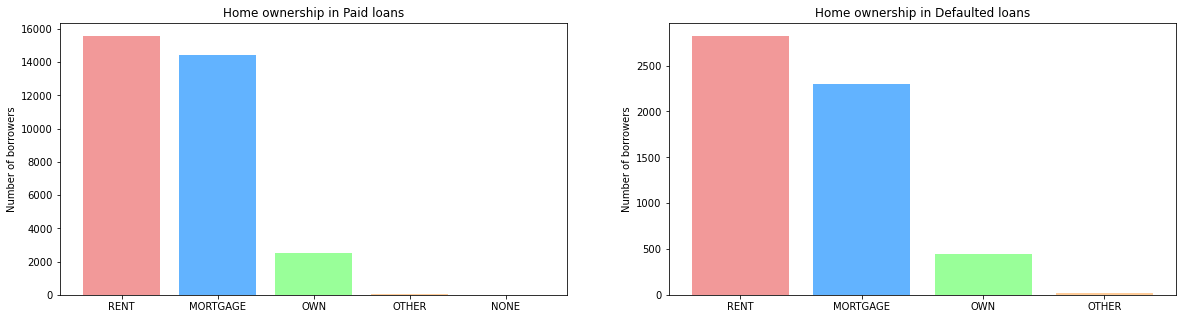

In [516]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5)) 

ax1.bar(height=paid_loans.home_ownership.value_counts().values,x = paid_loans.home_ownership.value_counts().index,color=colors)
ax1.set_title('Home ownership in Paid loans')
ax1.set_ylabel('Number of borrowers')
ax2.bar(height=defaulted_loans.home_ownership.value_counts().values,x = defaulted_loans.home_ownership.value_counts().index,color=colors)
ax2.set_title('Home ownership in Defaulted loans')
ax2.set_ylabel('Number of borrowers')
plt.show()

#Nothing significant observed from home ownership type

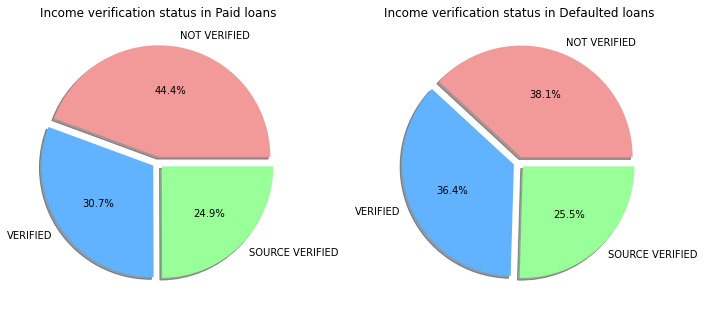

In [517]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) 

ax1.pie(paid_loans.verification_status.value_counts().values,labels = paid_loans.verification_status.value_counts().index,colors = colors,autopct = '%1.1f%%',explode=[0.05]*len(paid_loans.verification_status.value_counts().index),shadow=True)
ax1.set_title('Income verification status in Paid loans')

ax2.pie(defaulted_loans.verification_status.value_counts().values,labels = defaulted_loans.verification_status.value_counts().index,colors = colors,autopct = '%1.1f%%',explode=[0.05]*len(paid_loans.verification_status.value_counts().index),shadow=True)
ax2.set_title('Income verification status in Defaulted loans')

plt.tight_layout()
plt.show()


#Nothing significant observed from Income verification status

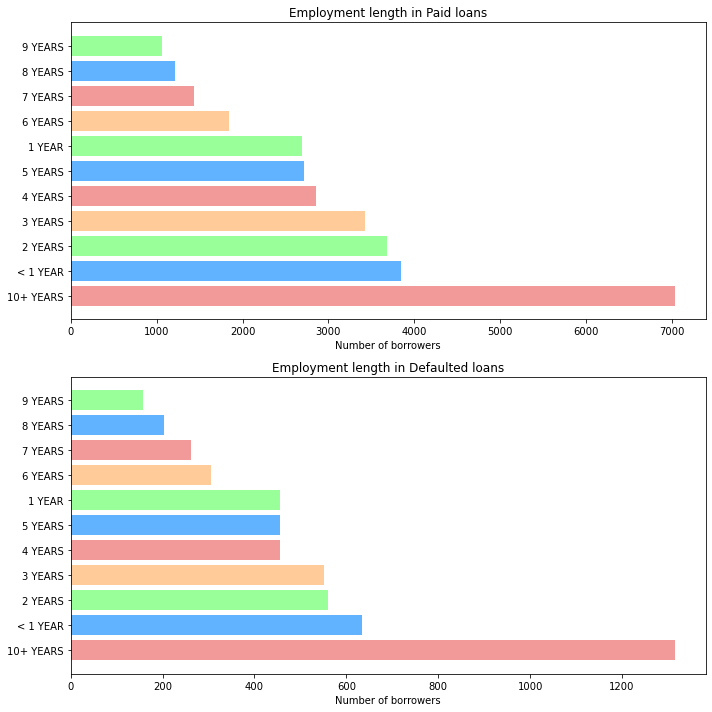

In [518]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10)) 

ax1.barh(width=paid_loans.emp_length.value_counts().values,y = paid_loans.emp_length.value_counts().index,color=colors)
ax1.set_title('Employment length in Paid loans')
ax1.set_xlabel('Number of borrowers')
ax2.barh(width=defaulted_loans.emp_length.value_counts().values,y = defaulted_loans.emp_length.value_counts().index,color=colors)
ax2.set_title('Employment length in Defaulted loans')
ax2.set_xlabel('Number of borrowers')
plt.tight_layout()
plt.show()

#Many borrowers seem to have mostly 10+ years of work length

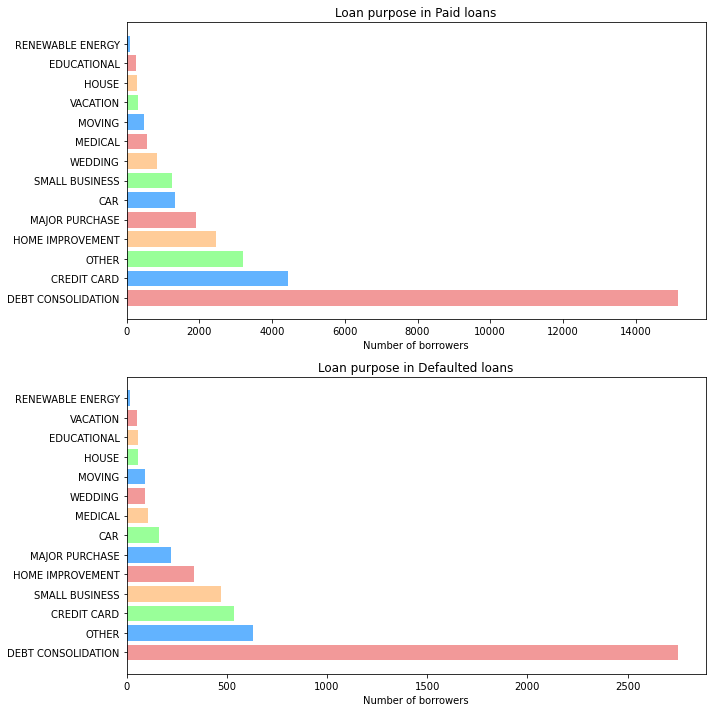

In [519]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10)) 

ax1.barh(width=paid_loans.purpose.value_counts().values,y = paid_loans.purpose.value_counts().index,color=colors)
ax1.set_title('Loan purpose in Paid loans')
ax1.set_xlabel('Number of borrowers')
ax2.barh(width=defaulted_loans.purpose.value_counts().values,y = defaulted_loans.purpose.value_counts().index,color=colors)
ax2.set_title('Loan purpose in Defaulted loans')
ax2.set_xlabel('Number of borrowers')
plt.tight_layout()
plt.show()

#Top common reason seems to be 'DEBT CONSOLIDATION'

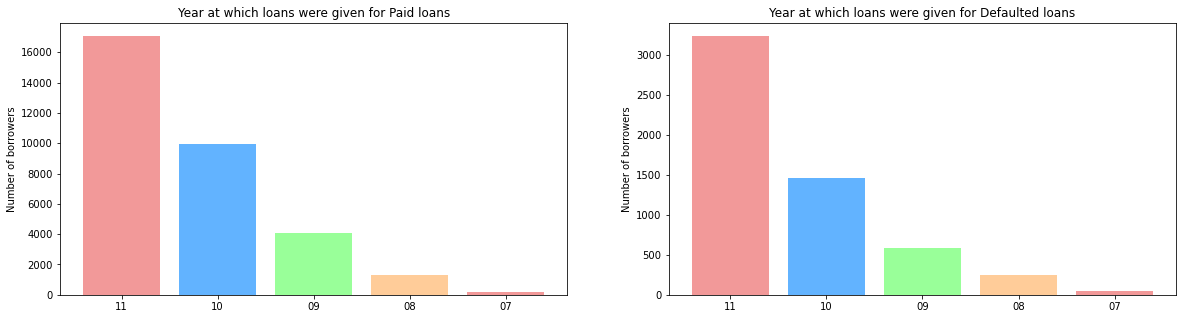

In [520]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5)) 

ax1.bar(height=paid_loans.loan_issued_year.value_counts().values,x = paid_loans.loan_issued_year.value_counts().index,color=colors)
ax1.set_title('Year at which loans were given for Paid loans')
ax1.set_ylabel('Number of borrowers')
ax2.bar(height=defaulted_loans.loan_issued_year.value_counts().values,x = defaulted_loans.loan_issued_year.value_counts().index,color=colors)
ax2.set_title('Year at which loans were given for Defaulted loans')
ax2.set_ylabel('Number of borrowers')
plt.show()

#More loans are disbursed from 2007 to 2011

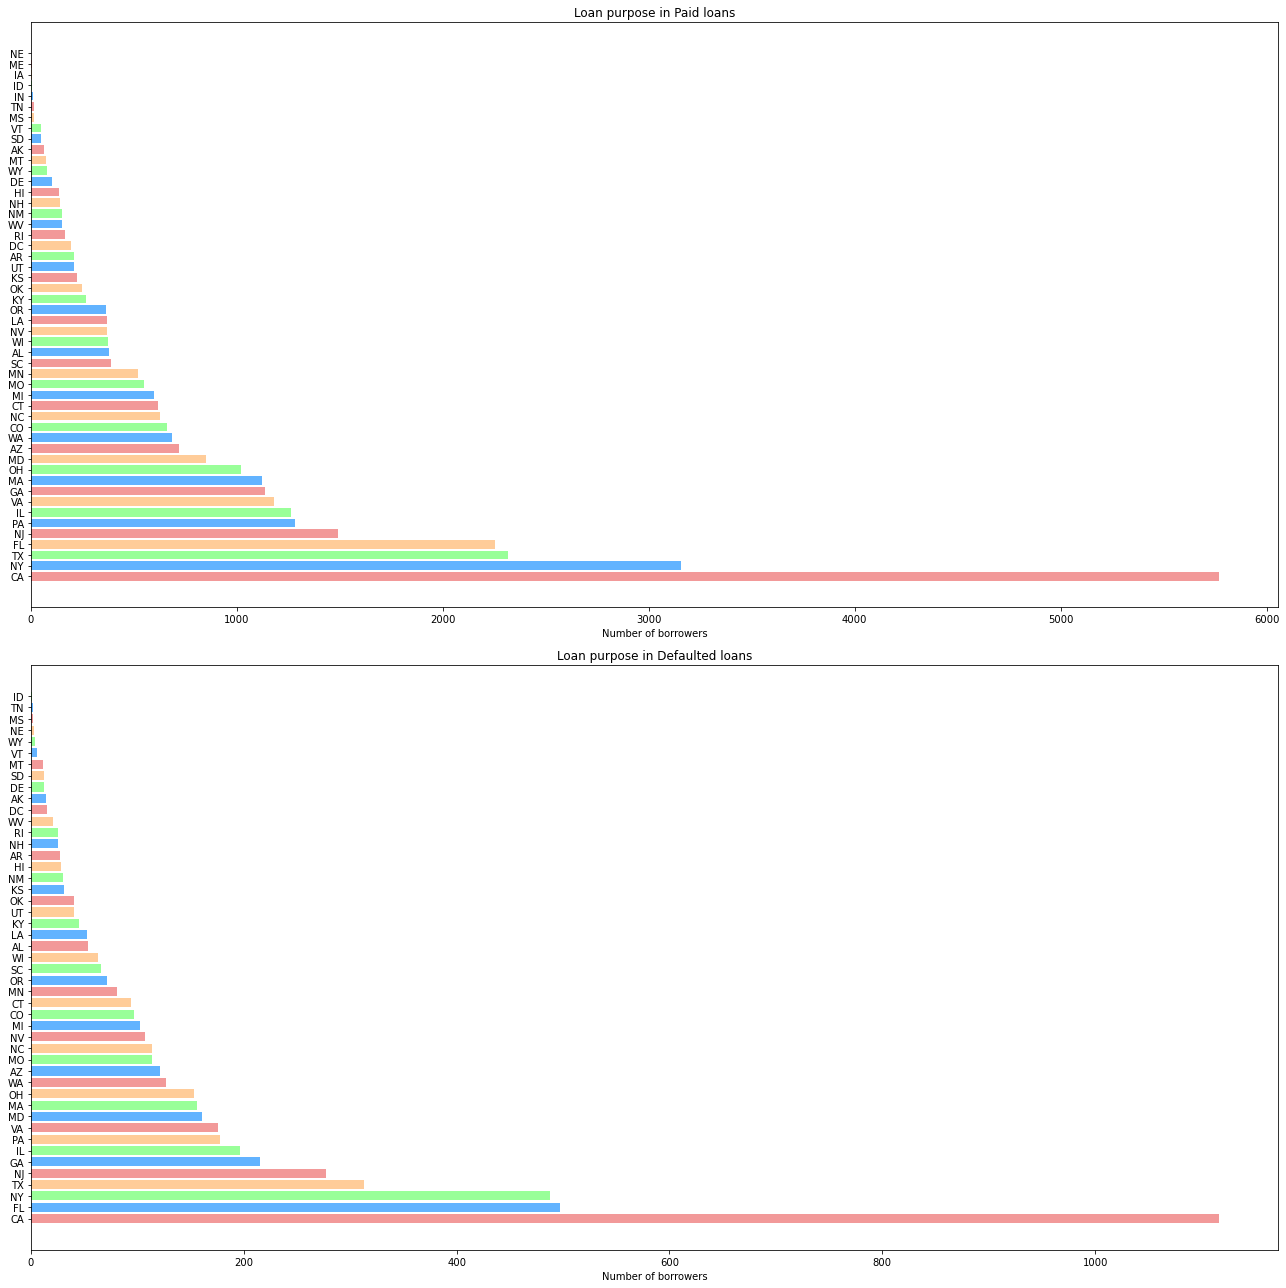

In [521]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,18)) 

ax1.barh(width=paid_loans.addr_state.value_counts().values,y = paid_loans.addr_state.value_counts().index,color=colors)
ax1.set_title('Loan purpose in Paid loans')
ax1.set_xlabel('Number of borrowers')
ax2.barh(width=defaulted_loans.addr_state.value_counts().values,y = defaulted_loans.addr_state.value_counts().index,color=colors)
ax2.set_title('Loan purpose in Defaulted loans')
ax2.set_xlabel('Number of borrowers')
plt.tight_layout()
plt.show()

#Top common state seems to be California

#### `continuous features`

In [522]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year,term_months,revol_credit_limit,loan_issued_year,region,loan_amnt_category,funded_amnt_category,funded_amnt_inv_category,int_rate_category,annual_inc_category
0,5000,5000,4975.00000,36 MONTHS,10.65000,162.87000,B,B2,10+ YEARS,RENT,24000.00000,VERIFIED,DEC-11,FULLY PAID,CREDIT CARD,AZ,27.65000,JAN-85,1,3,0,83.70000,9,0.00000,Dec,2011,36,16305.85000,11,WEST,<=$11500,<=$11500,<=$11500,<=12%,AVERAGE INCOME
1,2500,2500,2500.00000,60 MONTHS,15.27000,59.83000,C,C4,< 1 YEAR,RENT,30000.00000,SOURCE VERIFIED,DEC-11,CHARGED OFF,CAR,GA,1.00000,APR-99,5,3,0,9.40000,4,0.00000,Dec,2011,60,17946.81000,11,SOUTH,<=$11500,<=$11500,<=$11500,12%-18%,AVERAGE INCOME
2,2400,2400,2400.00000,36 MONTHS,15.96000,84.33000,C,C5,10+ YEARS,RENT,12252.00000,NOT VERIFIED,DEC-11,FULLY PAID,SMALL BUSINESS,IL,8.72000,NOV-01,2,2,0,98.50000,10,0.00000,Dec,2011,36,3001.02000,11,MIDWEST,<=$11500,<=$11500,<=$11500,12%-18%,AVERAGE INCOME
3,10000,10000,10000.00000,36 MONTHS,13.49000,339.31000,C,C1,10+ YEARS,RENT,49200.00000,SOURCE VERIFIED,DEC-11,FULLY PAID,OTHER,CA,20.00000,FEB-96,1,10,0,21.00000,37,0.00000,Dec,2011,36,26657.14000,11,WEST,<=$11500,<=$11500,<=$11500,12%-18%,AVERAGE INCOME
5,5000,5000,5000.00000,36 MONTHS,7.90000,156.46000,A,A4,3 YEARS,RENT,36000.00000,SOURCE VERIFIED,DEC-11,FULLY PAID,WEDDING,AZ,11.20000,NOV-04,3,9,0,28.30000,12,0.00000,Dec,2011,36,28137.81000,11,WEST,<=$11500,<=$11500,<=$11500,<=12%,AVERAGE INCOME


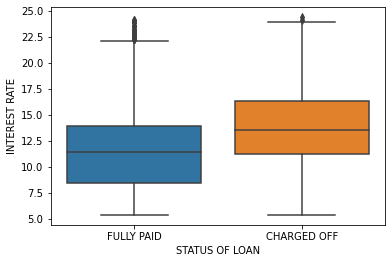

In [523]:
colors = ['#f29999','#62b3ff','#99ff99','#ffcc99']
sns.boxplot(x=df.loan_status,y=df.int_rate)
plt.xlabel('STATUS OF LOAN')
plt.ylabel('INTEREST RATE')
plt.show()

#Charged off loan have a higher interest rate

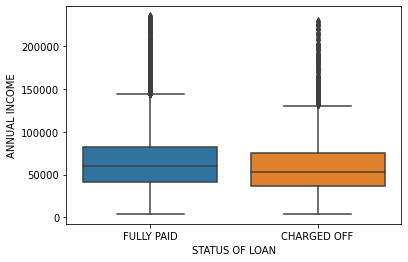

In [524]:
sns.boxplot(x=df.loan_status,y=df.annual_inc)
plt.xlabel('STATUS OF LOAN')
plt.ylabel('ANNUAL INCOME')
plt.show()

#Annual income of FULLY PAID borrowers seems to be higher

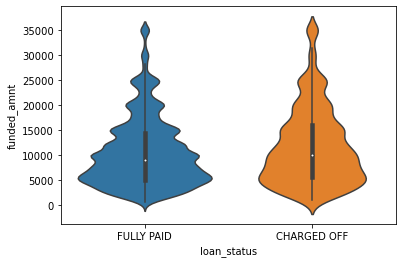

In [525]:
sns.violinplot(y=df.funded_amnt,x=df.loan_status)
plt.show()

#Both types of borrowers seem to get a similar amount funded

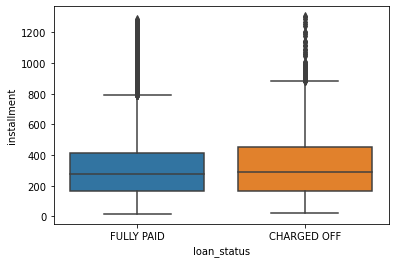

In [526]:
sns.boxplot(y=df.installment,x=df.loan_status)
plt.show()

#Similar installment amount per month is also observed

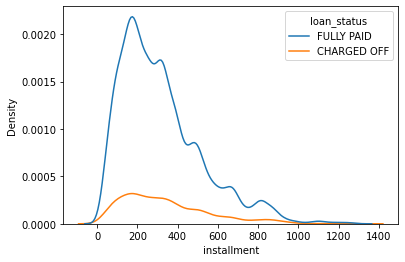

In [527]:
sns.kdeplot(x=df.installment,hue=df.loan_status)
plt.show()

#The number of borrowers who are charged off are lesser, so this difference is observed

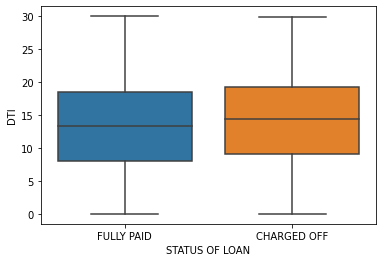

In [528]:
sns.boxplot(y=df.dti,x=df.loan_status)
plt.xlabel('STATUS OF LOAN')
plt.ylabel('DTI')
plt.show()
 #As expected, the debt to income ratio of defaulted borrowers is slightly higher

## `SEGMENTED ANALYSIS`

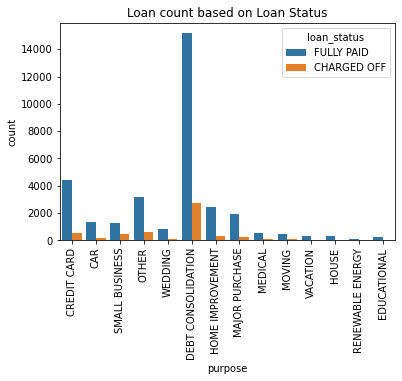

In [529]:
# Loan granted for various purposes

sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.title('Loan count based on Loan Status')
plt.show()

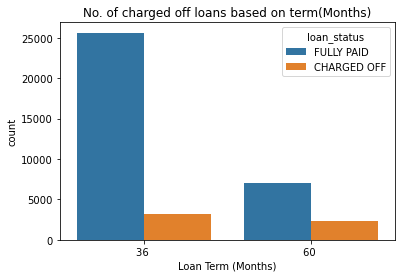

In [530]:
# Charged off loan counts as per loan count

sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term (Months)')
plt.title('No. of charged off loans based on term(Months)')
plt.show()

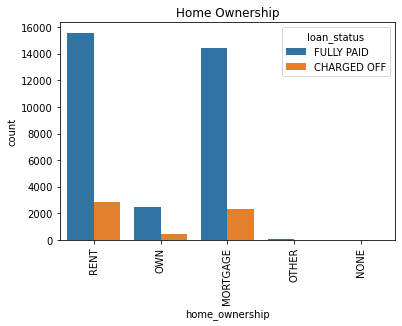

In [531]:
# Loans corresponding to Rent and Mortage were mostly paid
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.title("Home Ownership")
plt.show()

## `BIVARIATE ANALYSIS`

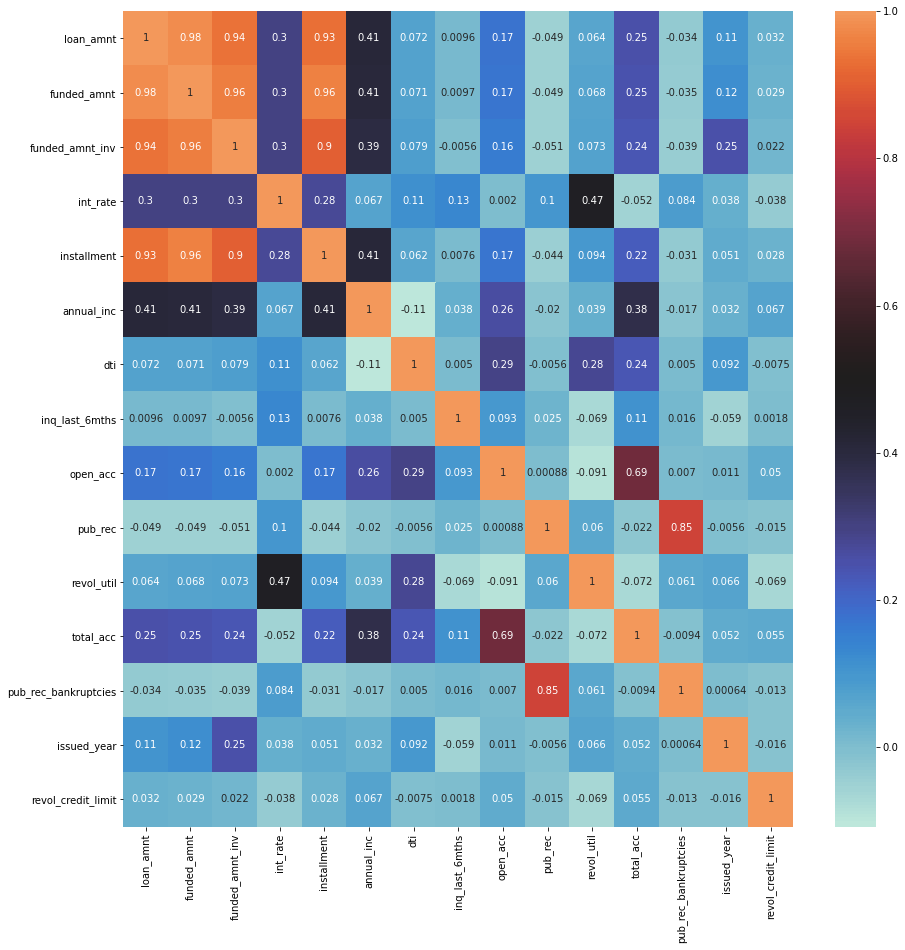

In [532]:
# Heatmap 

plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

In [533]:
# Bivariate Analysis on annual income against Charged off Proportion

inc_range_vs_loan = df.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['CHARGED OFF'] + inc_range_vs_loan['FULLY PAID'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['CHARGED OFF'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_category,CHARGED OFF,FULLY PAID,Total,Chargedoff_Proportion
0,LOW INCOME,20,78,98,0.20408
1,AVERAGE INCOME,2593,12698,15291,0.16958
2,HIGH INCOME,2971,19832,22803,0.13029


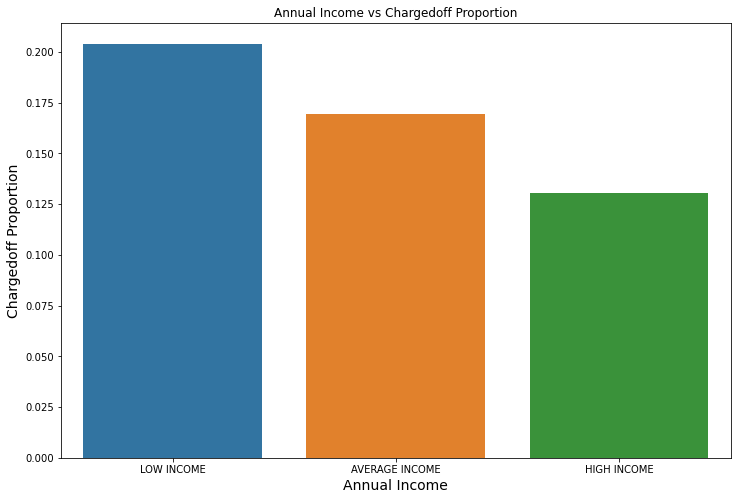

In [534]:
# Annual Income VS charged off loans

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion')
ax1=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data = inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

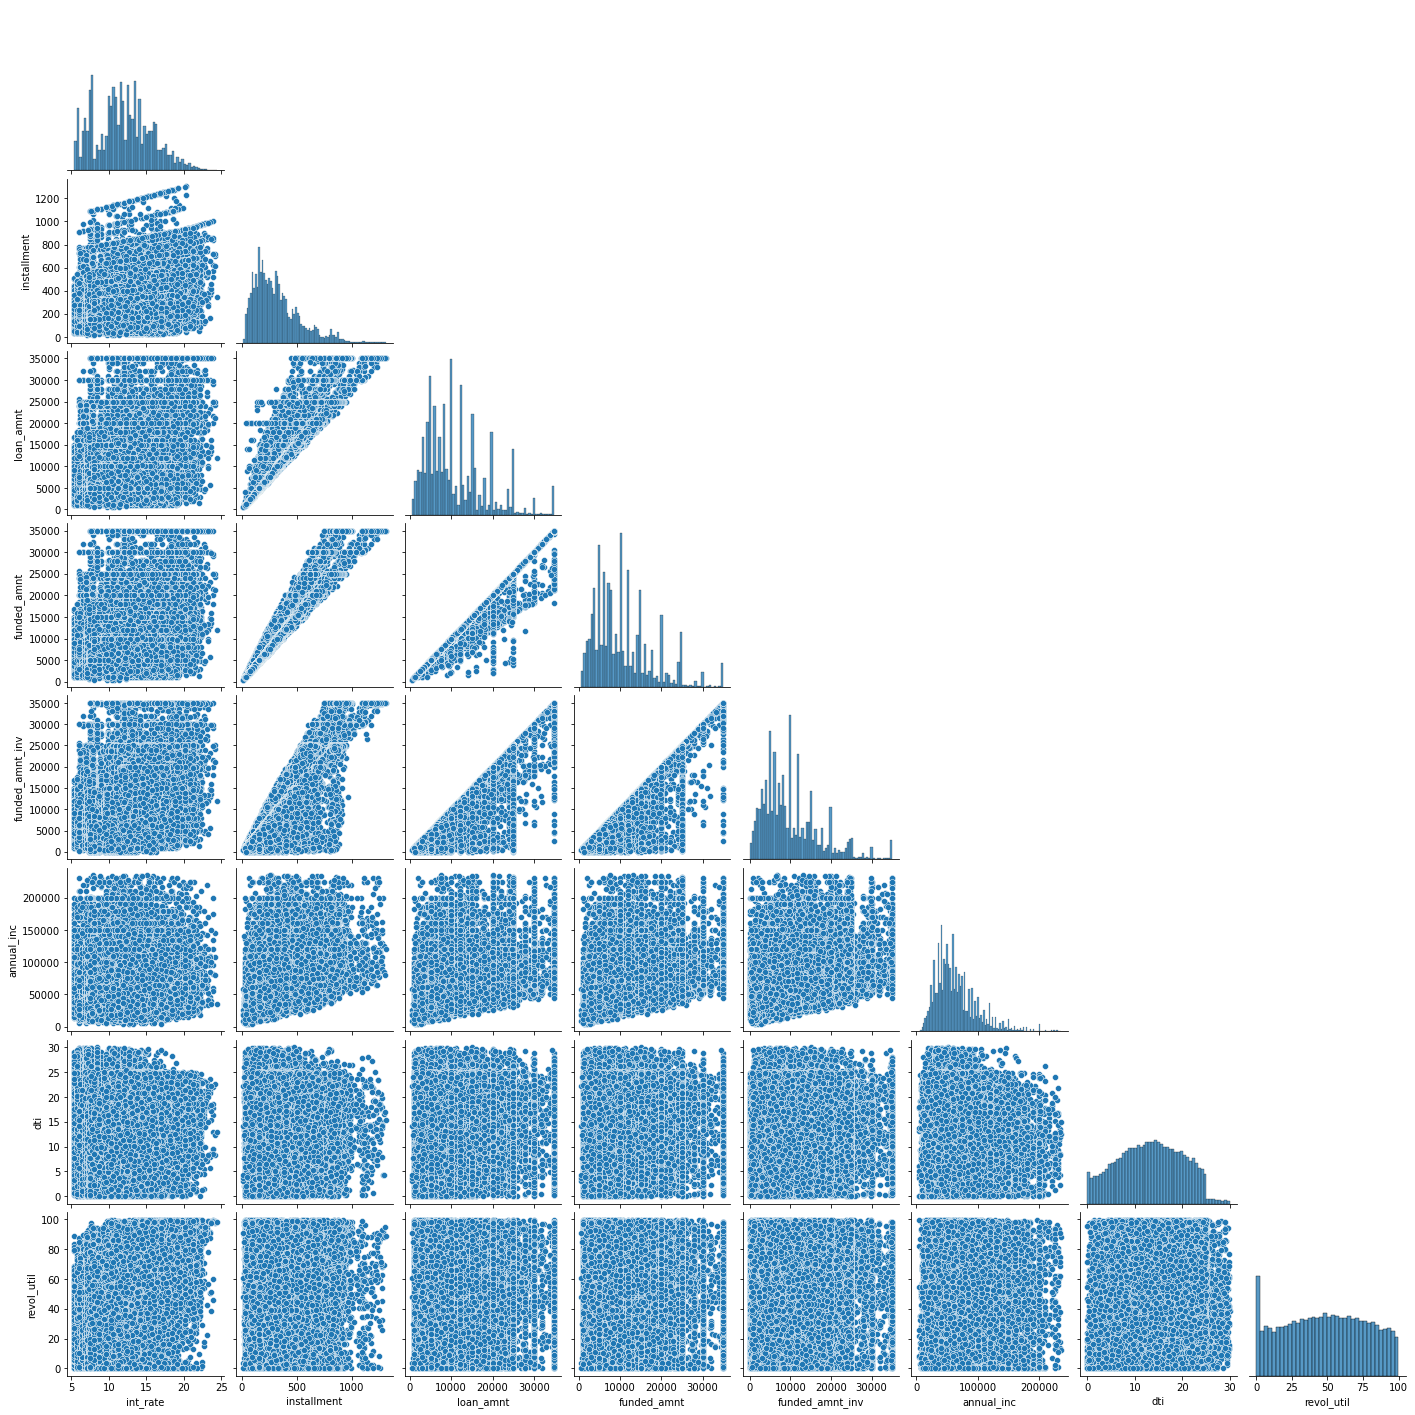

In [535]:
sns.pairplot(data=df[['int_rate','installment','loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','dti','revol_util']],corner=True)
plt.show()

In [536]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')

def plotLoanStatus(dataframe, by, loanstatus='CHARGED OFF'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

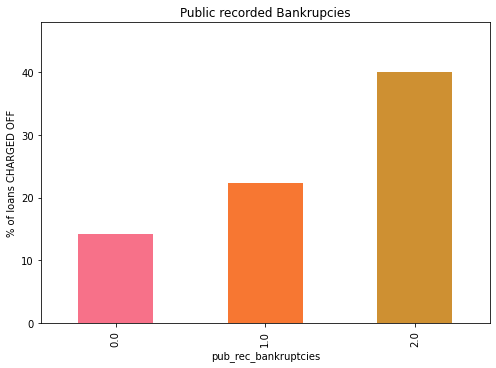

In [537]:
# Plot
plt.figure(figsize=(7,5))
plotLoanStatus(df, 'pub_rec_bankruptcies')
plt.title("Public recorded Bankrupcies")
plt.show()

In [538]:
#Analysis on purpose of Loan against Chargedoff_Proportion
purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['CHARGED OFF'] + purpose_vs_loan['FULLY PAID'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['CHARGED OFF'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,CHARGED OFF,FULLY PAID,Total,Chargedoff_Proportion
11,SMALL BUSINESS,472,1251,1723,0.27394
10,RENEWABLE ENERGY,19,81,100,0.19000
3,EDUCATIONAL,55,268,323,0.17028
9,OTHER,629,3203,3832,0.16414
5,HOUSE,58,299,357,0.16246
8,MOVING,91,479,570,0.15965
7,MEDICAL,106,568,674,0.15727
2,DEBT CONSOLIDATION,2752,15164,17916,0.15361
12,VACATION,53,322,375,0.14133
4,HOME IMPROVEMENT,338,2459,2797,0.12084


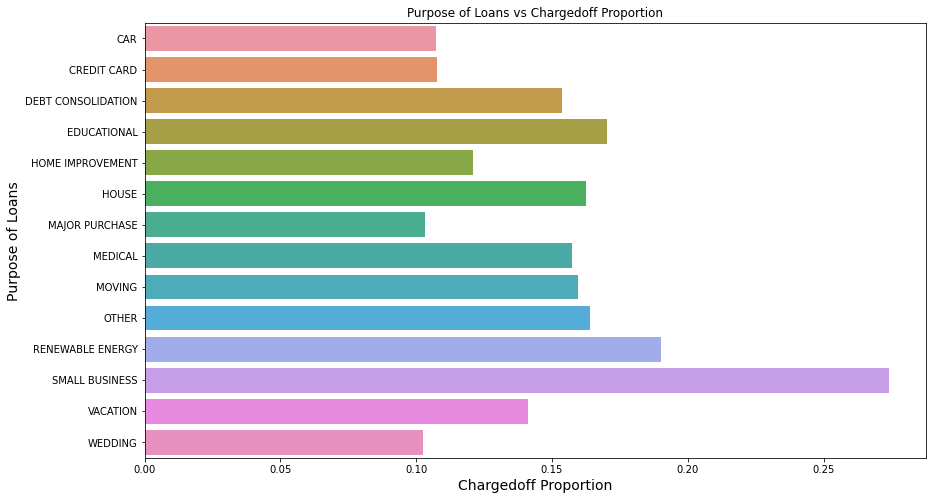

In [539]:
#Bar plot on above calculated values.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()

In [540]:
# grade against Charged off Proportion
grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['CHARGED OFF'] + grade_vs_loan['FULLY PAID'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['CHARGED OFF'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,CHARGED OFF,FULLY PAID,Total,Chargedoff_Proportion
6,G,99,190,289,0.34256
5,F,312,642,954,0.32704
4,E,704,1906,2610,0.26973
3,D,1112,3916,5028,0.22116
2,C,1342,6411,7753,0.17309
1,B,1414,10167,11581,0.12210
0,A,601,9376,9977,0.06024


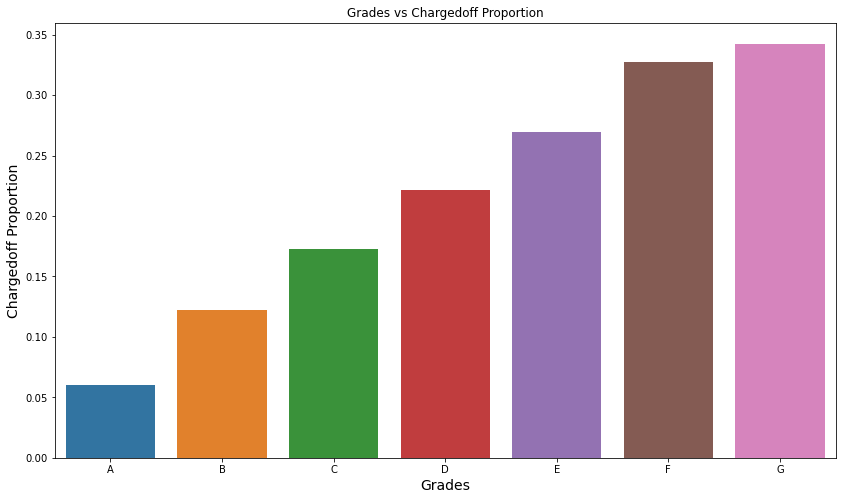

In [541]:
#Analysing
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff Proportion')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

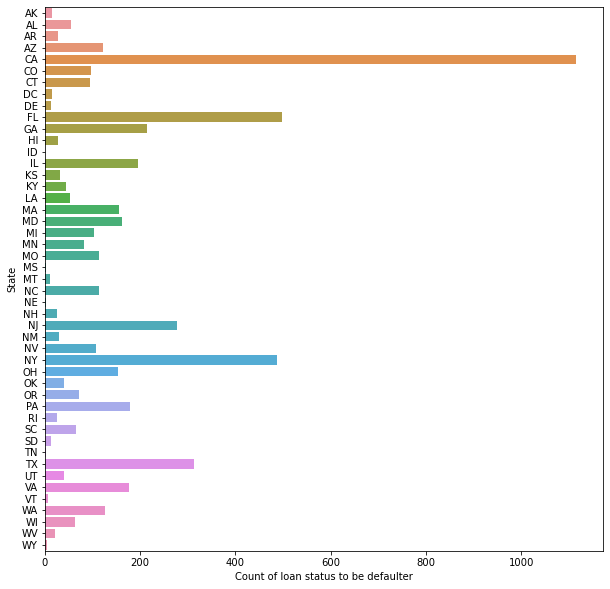

In [542]:
# Most number of defaulters are from the state of CA, followed by FL

g = df[df['loan_status']=='CHARGED OFF'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

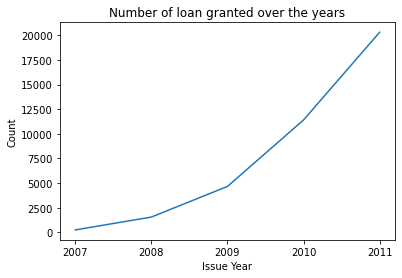

In [543]:
g = df.groupby('issued_year')['loan_status'].count()
g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('Number of loan granted over the years')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.show()

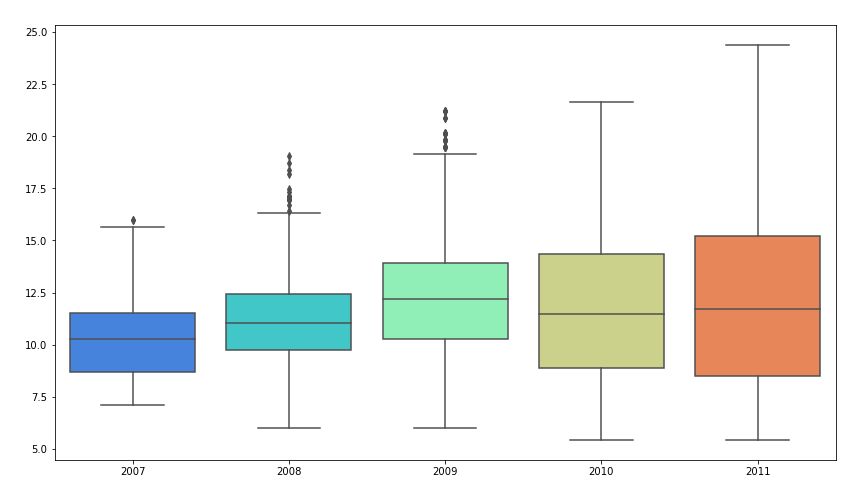

In [544]:
# Box Plot
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='issued_year', data =df,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

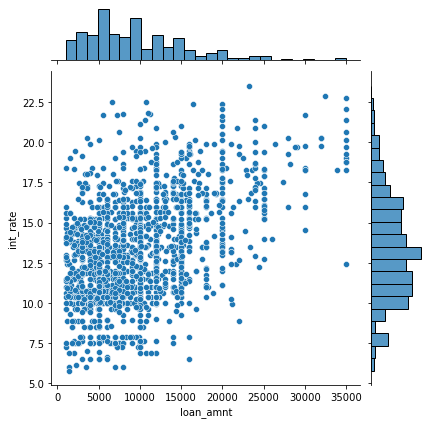

In [545]:
sns.jointplot('loan_amnt', 'int_rate', df.loc[df.pub_rec_bankruptcies > 0])

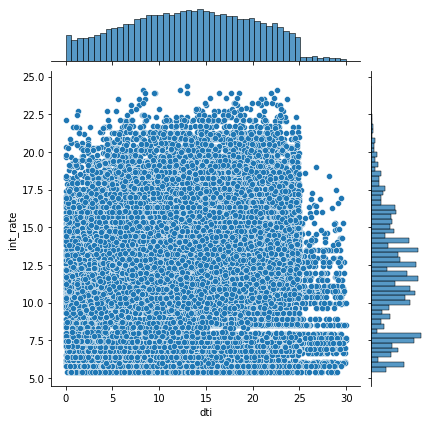

In [546]:
sns.jointplot('dti', 'int_rate', data = df)